<a href="https://colab.research.google.com/github/fahad-manzer/Machine-Learning-Projects/blob/main/Stocks_Price_Analysis_GOOG_VIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 9.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=yf.download(['GOOG','^VIX'],
               start='2000-01-01',
               end='2023-02-24',
               progress=False)

In [4]:
df

Adj Close                 Close                  High             \
                 GOOG       ^VIX       GOOG       ^VIX       GOOG       ^VIX   
Date                                                                           
2000-01-03        NaN  24.209999        NaN  24.209999        NaN  26.150000   
2000-01-04        NaN  27.010000        NaN  27.010000        NaN  27.180000   
2000-01-05        NaN  26.410000        NaN  26.410000        NaN  29.000000   
2000-01-06        NaN  25.730000        NaN  25.730000        NaN  26.709999   
2000-01-07        NaN  21.719999        NaN  21.719999        NaN  25.170000   
...               ...        ...        ...        ...        ...        ...   
2023-02-16  95.779999  20.170000  95.779999  20.170000  97.879997  20.270000   
2023-02-17  94.589996  20.020000  94.589996  20.020000  95.750000  21.299999   
2023-02-21  92.050003  22.870001  92.050003  22.870001  93.415001  23.340000   
2023-02-22  91.800003  22.290001  91.800003  22.290001  92.360001  23.629999   
2023-02-23  91.070000  21.139999  91.070000  21.139999  92.129997  22.430000   

                  Low                  Open                 Volume       
                 GOOG       ^VIX       GOOG       ^VIX        GOOG ^VIX  
Date                                                                     
2000-01-03        NaN  23.980000        NaN  24.360001         NaN    0  
2000-01-04        NaN  24.799999        NaN  24.940001         NaN    0  
2000-01-05        NaN  25.850000        NaN  27.980000         NaN    0  
2000-01-06        NaN  24.700001        NaN  26.680000         NaN    0  
2000-01-07        NaN  21.719999        NaN  25.139999         NaN    0  
...               ...        ...        ...        ...         ...  ...  
2023-02-16  94.970001  18.230000  95.540001  18.260000  35642100.0    0  
2023-02-17  93.449997  19.820000  95.070000  20.940001  31074100.0    0  
2023-02-21  92.000000  21.799999  93.239998  21.799999  28367200.0    0  
2023-02-22  90.870003  22.020000  91.933998  23.030001  29891100.0    0  
2023-02-23  90.010002  20.889999  92.129997  21.959999  32423700.0    0  

[5823 rows x 12 columns]

In [5]:
df=df[['Adj Close']]
df

Adj Close           
                 GOOG       ^VIX
Date                            
2000-01-03        NaN  24.209999
2000-01-04        NaN  27.010000
2000-01-05        NaN  26.410000
2000-01-06        NaN  25.730000
2000-01-07        NaN  21.719999
...               ...        ...
2023-02-16  95.779999  20.170000
2023-02-17  94.589996  20.020000
2023-02-21  92.050003  22.870001
2023-02-22  91.800003  22.290001
2023-02-23  91.070000  21.139999

[5823 rows x 2 columns]

In [6]:
df.columns=df.columns.droplevel(0)
df.columns

Index(['GOOG', '^VIX'], dtype='object')

In [7]:
df=df.rename(columns={'GOOG':'goog','^VIX':'VIX'})

In [8]:
df

,goog,VIX
Date,,
2000-01-03,NaN,24.209999
2000-01-04,NaN,27.010000
2000-01-05,NaN,26.410000
2000-01-06,NaN,25.730000
2000-01-07,NaN,21.719999
...,...,...
2023-02-16,95.779999,20.170000
2023-02-17,94.589996,20.020000
2023-02-21,92.050003,22.870001


In [9]:
df.head()

,goog,VIX
Date,,
2000-01-03,NaN,24.209999
2000-01-04,NaN,27.010000
2000-01-05,NaN,26.410000
2000-01-06,NaN,25.730000
2000-01-07,NaN,21.719999


In [10]:
df.tail()

,goog,VIX
Date,,
2023-02-16,95.779999,20.170000
2023-02-17,94.589996,20.020000
2023-02-21,92.050003,22.870001
2023-02-22,91.800003,22.290001
2023-02-23,91.070000,21.139999


In [11]:
df['log_rtn']=np.log(df.goog/df.goog.shift(1))
df['log_rtn']

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2023-02-16   -0.013687
2023-02-17   -0.012502
2023-02-21   -0.027220
2023-02-22   -0.002720
2023-02-23   -0.007984
Name: log_rtn, Length: 5823, dtype: float64

In [12]:
df['VIXlog_rtn']=np.log(df.VIX/df.VIX.shift(1))
df['VIXlog_rtn']

Date
2000-01-03         NaN
2000-01-04    0.109441
2000-01-05   -0.022464
2000-01-06   -0.026085
2000-01-07   -0.169424
                ...   
2023-02-16    0.101128
2023-02-17   -0.007465
2023-02-21    0.133094
2023-02-22   -0.025688
2023-02-23   -0.052971
Name: VIXlog_rtn, Length: 5823, dtype: float64

In [13]:
df['log_rtn'],df['VIXlog_rtn']

(Date
 2000-01-03         NaN
 2000-01-04         NaN
 2000-01-05         NaN
 2000-01-06         NaN
 2000-01-07         NaN
                 ...   
 2023-02-16   -0.013687
 2023-02-17   -0.012502
 2023-02-21   -0.027220
 2023-02-22   -0.002720
 2023-02-23   -0.007984
 Name: log_rtn, Length: 5823, dtype: float64, Date
 2000-01-03         NaN
 2000-01-04    0.109441
 2000-01-05   -0.022464
 2000-01-06   -0.026085
 2000-01-07   -0.169424
                 ...   
 2023-02-16    0.101128
 2023-02-17   -0.007465
 2023-02-21    0.133094
 2023-02-22   -0.025688
 2023-02-23   -0.052971
 Name: VIXlog_rtn, Length: 5823, dtype: float64)

In [14]:
df.dropna(how='any',axis=0,inplace=True)

In [15]:
df.dropna()

,goog,VIX,log_rtn,VIXlog_rtn
Date,,,,
2004-08-20,2.697639,16.000000,0.076433,-0.058269
2004-08-23,2.724787,15.880000,0.010013,-0.007528
2004-08-24,2.611960,15.330000,-0.042289,-0.035249
2004-08-25,2.640104,14.980000,0.010717,-0.023096
2004-08-26,2.687676,14.910000,0.017859,-0.004684
...,...,...,...,...
2023-02-16,95.779999,20.170000,-0.013687,0.101128
2023-02-17,94.589996,20.020000,-0.012502,-0.007465
2023-02-21,92.050003,22.870001,-0.027220,0.133094


In [16]:
corr_coeff=df.log_rtn.corr(df.VIXlog_rtn)

In [17]:
corr_coeff

-0.48547979923021045

[Text(0.5, 1.0, 'GOOG VS VIX ($\\rho$=-0.49)')]

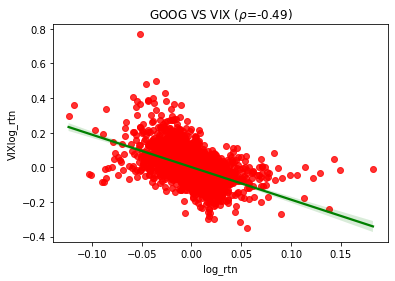

In [18]:
ax=sns.regplot(x='log_rtn',color='red',y='VIXlog_rtn',data=df,line_kws={'color':'green'})
ax.set(title=f'GOOG VS VIX ($\\rho$={corr_coeff:.2f})')